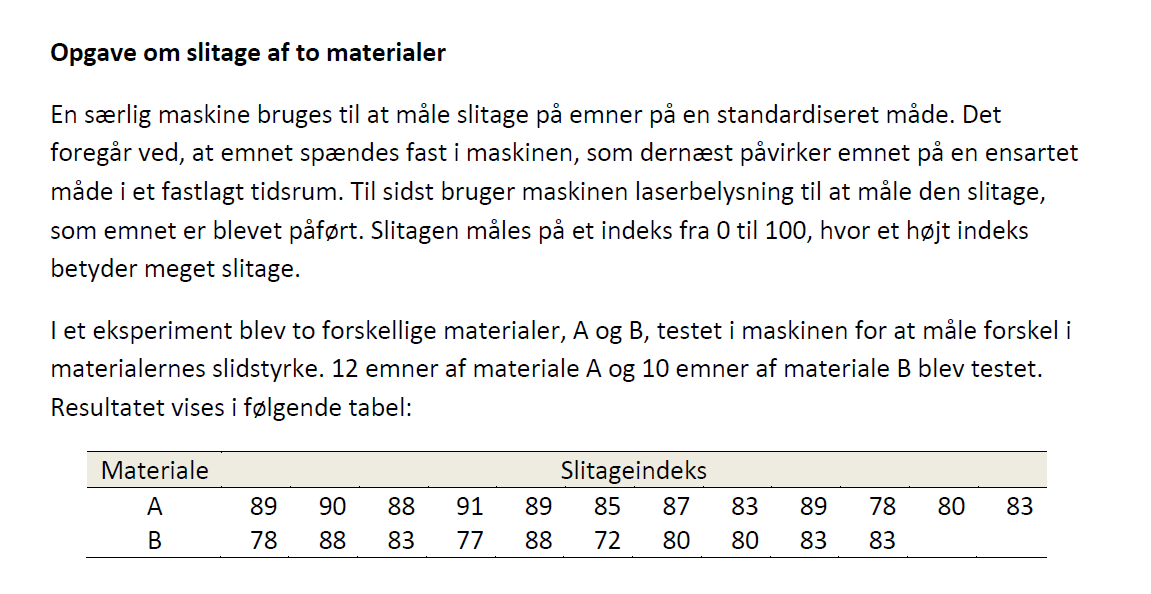

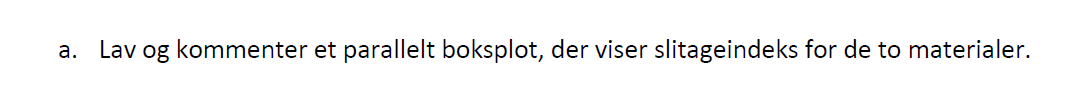

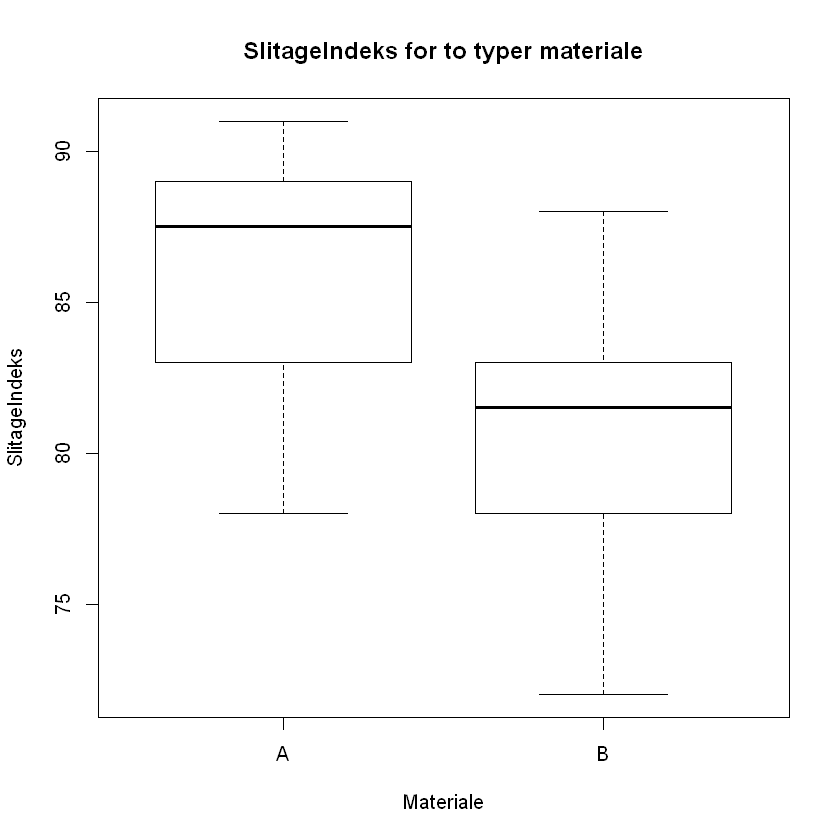

In [75]:
# Hent data
D = read.table("slitage_2_materialer.csv", header=TRUE, sep=";")
Materiale = D$Materiale
SlitageIndex = D$SlitageIndeks

# Parallelt boksplot
boxplot(SlitageIndex ~ Materiale,
        main="SlitageIndeks for to typer materiale",
        xlab="Materiale",
        ylab="SlitageIndeks" )

Spredningen på de to ser meget ens ud. Dog er de meget forskudt. SlitageIndekset er generelt lavere for Materiale B. Spredningen ser dog en smulere større ud ved materiale B. Begge haler er større, mest den højre. 

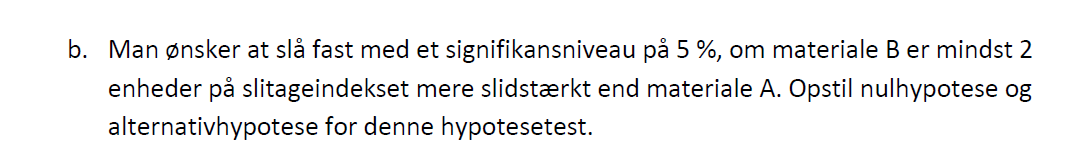

Der tages udgangspunkt i middelværdier. Der er en hypotese om at materiale B er mindst to enheder på slitageindekset stærkere end materiale A. Dvs. at materiale B har et indeks der er to lavere. Derfor er det vores alternativ hypoteste. Vores nulhypotese er det omvendte, altså: <br> 
Fra løsningforslag er det givet som: <br>
$H_0: \mu_A - \mu_B = \delta_0$ <br>
$H_1: \mu_A - \mu_B >\delta_0$ <br>
Hvor $\delta_0 = 2$

Det burde måske også medtages når $\mu_B$ er præcis 2 indekser mindre end $\mu_A$. 

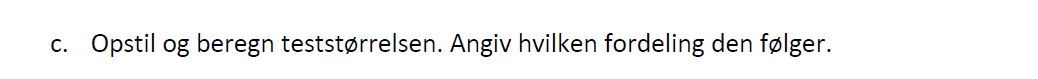

Teststørrelsen er gived ved:
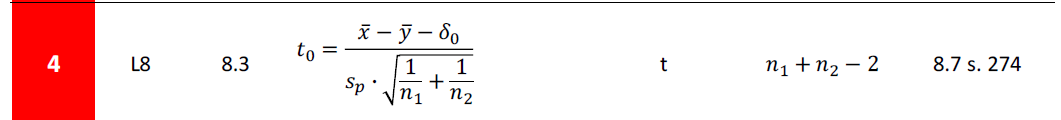
Da hypotesetesten omhandler middelværdi, vi ikke kender populationsvariancen, der er to stikprøver, de er små (<30) og de er parvisuafhængige.

Hvor $s_p^2$ beregnes:
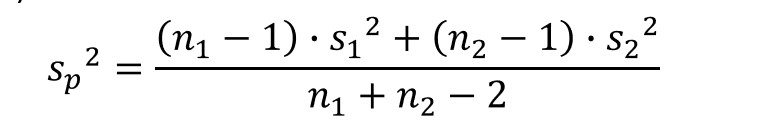

In [76]:
n_A = 12
n_B = 10
A = SlitageIndex[1:n_A]
A
B = SlitageIndex[(n_A+1):(n_A+n_B)]
B

# s_p beregnes
s_A = sd(A)
s_B = sd(B)
sp_sq = ((n_A-1)*s_A**2+(n_B-1)*s_B**2)/(n_A+n_B-2)
sp = sqrt(sp_sq)
"Sp:"
sp

# t_0 beregnes
A_streg = mean(A)
B_streg = mean(B)
delta_0 = 2
t_0 = (A_streg-B_streg-delta_0)/(sp*sqrt((1/n_A)+(1/n_B)))
"t_0:"
t_0

[1] 89 90 88 91 89 85 87 83 89 78 80 83

[1] 78 88 83 77 88 72 80 80 83 83

[1] "Sp:"

[1] 4.525483

[1] "t_0:"

[1] 1.445015

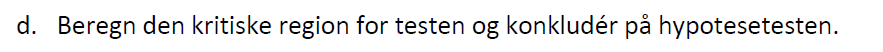

Først beregnes $t_\alpha$. Dette er en student's t-fordeling med $n_1+n_2-2$ frihedsgrader.

In [77]:
alfa = 0.05
t_alfa = qt(1-alfa, n_A + n_B - 2)
t_alfa

[1] 1.724718

Da $t_0 < t_\alpha$, kan nulhypotesen ikke forkastes. Vi kan altså ikke konkludere at materiale B er har et slitageIndex på 2 højere end materiale A med 5% signifikansniveau.

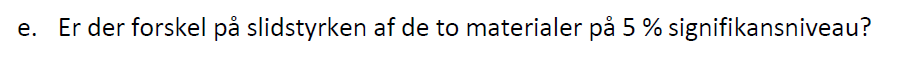

Der laves en ny hypotesetest: <br>
$\delta_0 = 0$ <br>
$H_0: \mu_A - \mu_B = \delta_0$ <br>
$H_1: \mu_A - \mu_B \neq \delta_0$

Denne er tosidet.

In [78]:
delta_0 = 0
t_0 = (A_streg-B_streg-delta_0)/(sp*sqrt((1/n_A)+(1/n_B)))
t_alfa_halve = qt(1-alfa/2, n_A + n_B - 2)
t_0
t_alfa_halve

[1] 2.477168

[1] 2.085963

Da $t_0 > t_{\alpha/2}$ forkastes nulhypotesen. Derfor er der altså forskel i slidstyrken på de to materieler, på et 5% signifikansniveau.

Hvad ville det kræve for at nulhypotesen ikke skulle forkastes? Fordi den er tosidet, vil vi forkaste nulhypotesen, hvis $t_0 >t_{\alpha/2}$ eller hvis $t_0 < -t_{\alpha/2}$. Mere konkret når $|t_0| > t_{\alpha/2}$

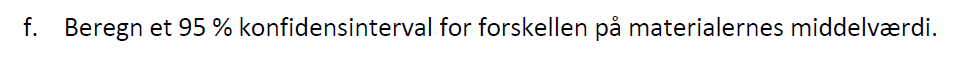

Givet ved: 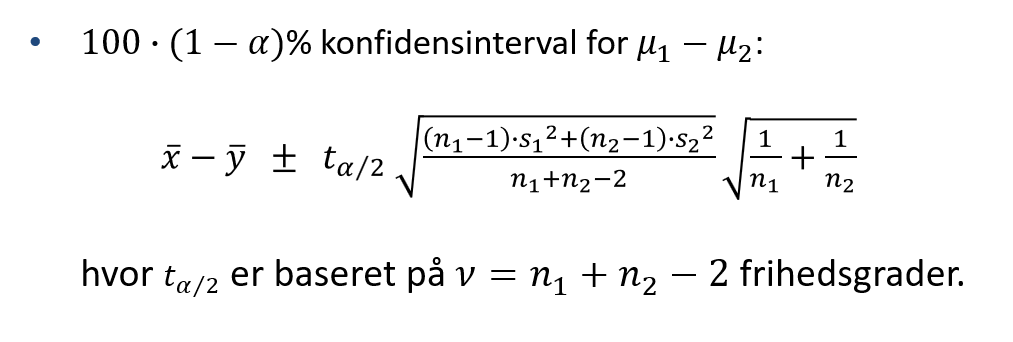

In [79]:
KI_lav = A_streg - B_streg - t_alfa_halve*sp*sqrt((1/n_A) + (1/n_B))
KI_hoj = A_streg - B_streg + t_alfa_halve*sp*sqrt((1/n_A) + (1/n_B))
KI_lav
KI_hoj

[1] 0.7580365

[1] 8.841964

Dette giver konfidensintervallet for $\mu_1-\mu-2$ på [0.76; 8.84]. I dette er 0 ikke inkluderet. Derfor er der altså stor sandsynlighed for at der er forskel på $\mu_1$ og $\mu_2$.

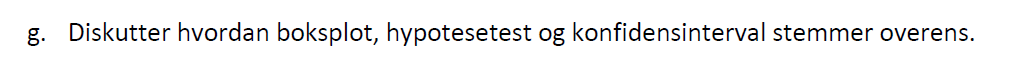

Boksplottet viste at slitageindekset generelt var lavere for materiale B, dog med en smule større spredning. <br>
Det kunne ikke konkluderes at materiale B var mindst 2 enheder på slitageindekset mere stærkt end materiale A, inden for 5% signifikansniveau. <br>
Det kunne konkluderes at materiale A og materiale B havde en forskel på slidstyrke indenfor 5% signifikansniveau. <br>
Konfidensintervallet for $\mu_1-\mu-2$ var på [0.76; 8.84]. Da 0 ikke var inkluderet blev det konkluderet at der var stor sandsynlighed for at der var forskel på $\mu_0$ og $\mu_1$. <br> <br>

Helt generelt viser de at der er stor sandsynlighed for at der er forskel på hvor slidstærke materiale A og materiale B er.

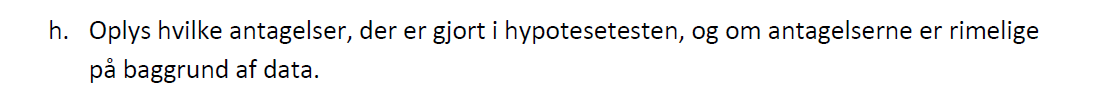

Der blev antaget CGS. Dog er der maks 12 elementer, hvilket er et godt stykke fra 30. Først når man har 30 observationer og mere, kan man være sikre på CGS.

Antagelser for denne metode: Begge populationer er normalfordelte og de har samme standardafvigelse $\sigma_1 = \sigma_2 = \sigma$

Generelt er det givet at metoden kan bruges så længe at fordelingerne er pæne, og den ene standardafvigelse ikke er mere end fire gange større end den anden. Dette tjekkes herunder. Med et stem and leaf plot tjekkes hvor 'pæne' fordelingerne er, og med et normalfordelingsplot (Quantiale-Quantile plot) tjekkes om populationerne er noglelunde normalfordelte.

In [80]:
sd(A)
sd(B)

[1] 4.177864

[1] 4.91709

Det ses at standardafvigelserne ikke er langt fra hindanden.

In [81]:
stem(A)
stem(B)


  The decimal point is 1 digit(s) to the right of the |

  7 | 8
  8 | 033
  8 | 578999
  9 | 01


  The decimal point is 1 digit(s) to the right of the |

  7 | 2
  7 | 78
  8 | 00333
  8 | 88



Det ses at fordelingerne er ret pæne. De har meget samme form. Men har begge lidt venstre hale.

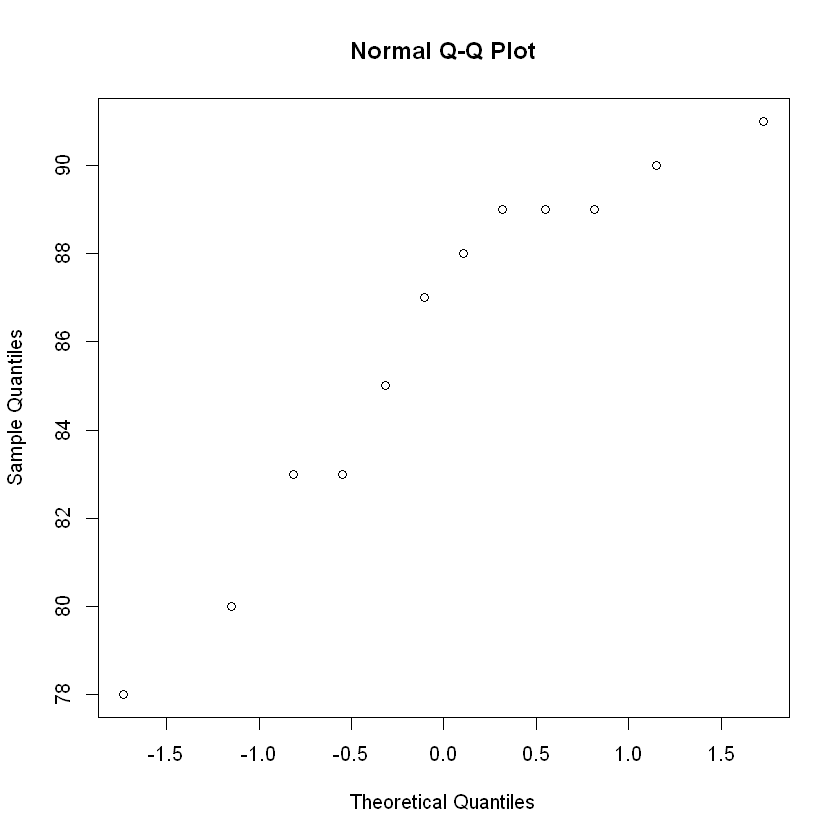

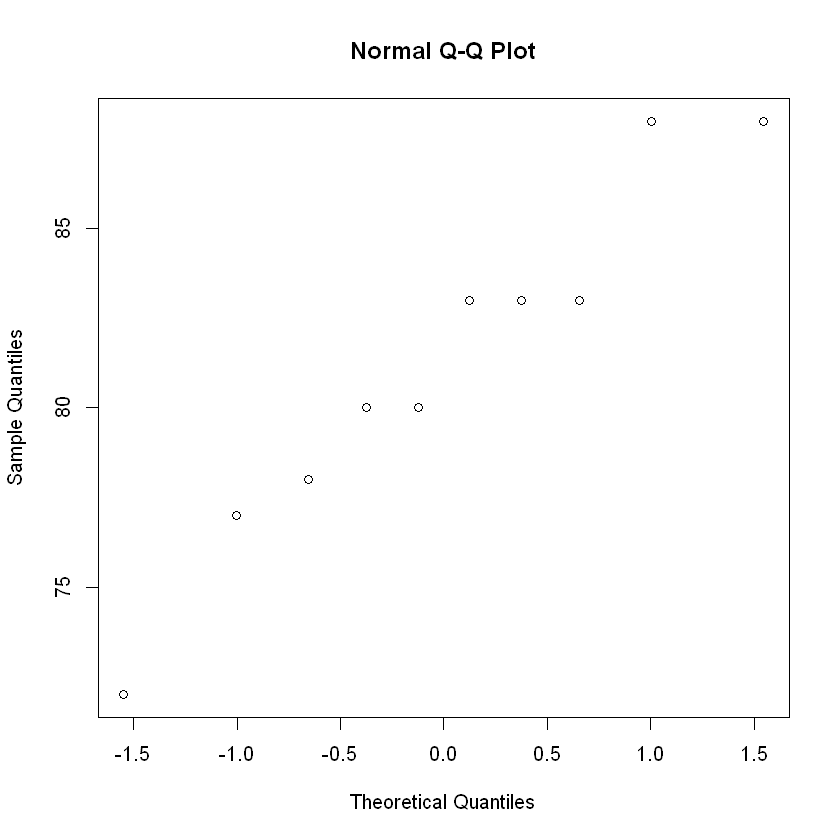

In [82]:
qqnorm(A)
qqnorm(B)

Det ligner at de begge følger ret lineære tendenser. Derfor kan det godt antages at de følger en normalfordeling.

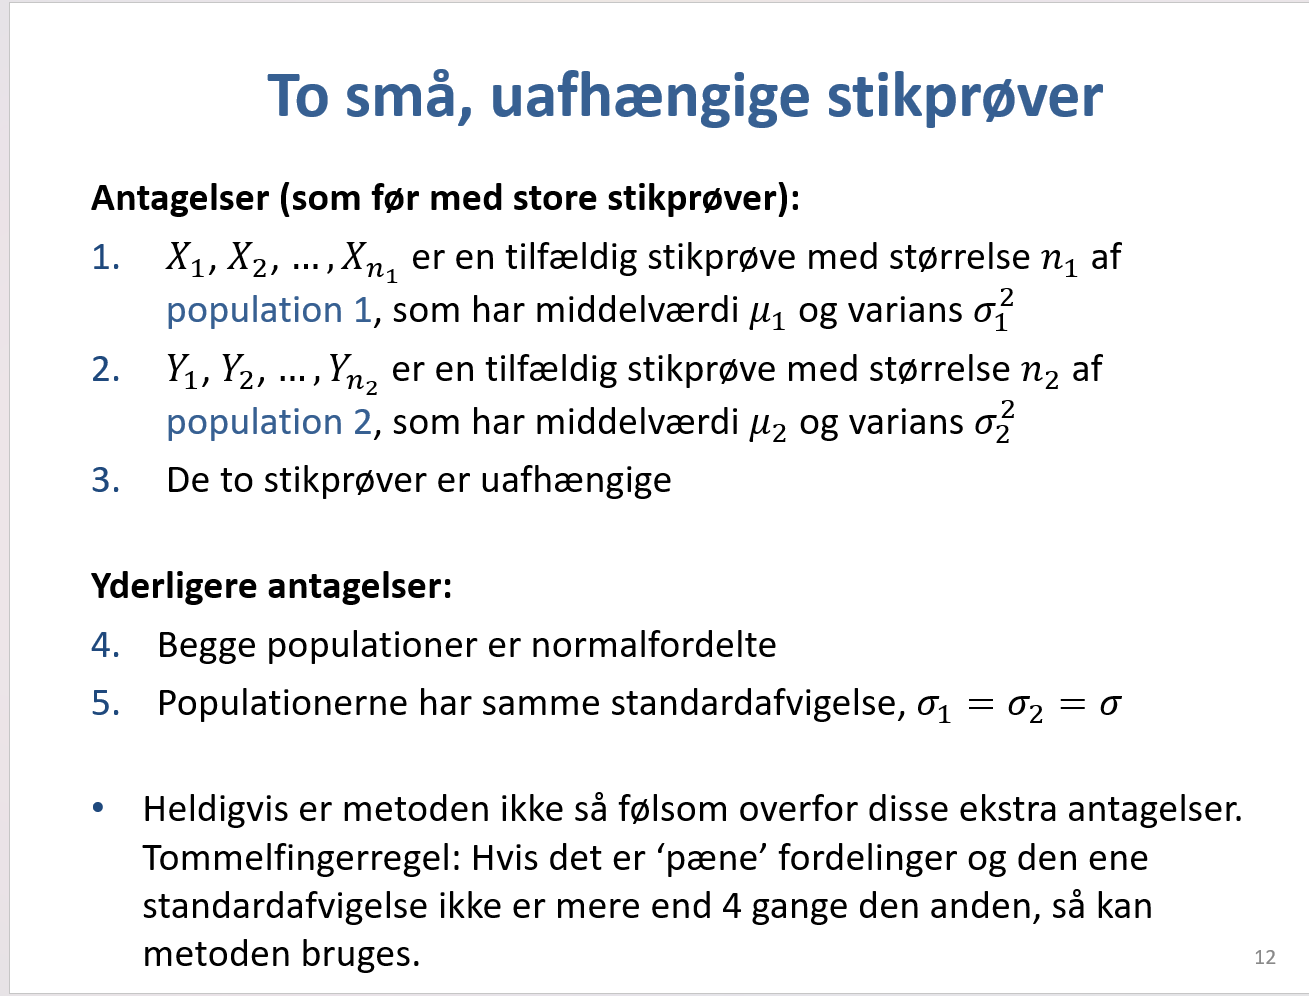